### Overview

This notebook will be a quick introduction to python's pandas library for beginners to data science.
It will be typed out live before and audience as a code along introductory session.

<b>The learning objectives in 15 minutes:</b>
1. Learn two ways to load data into pandas
2. Exploratory data analysis
    - Ways to View Sample Data
    - Change Headers
    - Manipulate Columns and Rows
    - Find Data Using Statistics
    - Quick Plots with Pandas Plot Methods
3. Review learnings and possible next steps

### Imports and Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Method 1: Download csv from https://finance.yahoo.com/quote/AAPL/history?p=AAPL
aapl_sheet = pd.read_csv('./data/AAPL.csv')

In [2]:
aapl_sheet.sample(3)

,Date,Open,High,Low,Close,Adj Close,Volume
442,1982-09-14,0.084263,0.084821,0.084263,0.084263,0.066366,101494400.0
8807,2015-11-12,29.065001,29.205000,28.912500,28.930000,26.802820,130102400.0
441,1982-09-13,0.081473,0.082031,0.081473,0.081473,0.064168,58889600.0


In [3]:
aapl_sheet.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101087,469033600.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095813,175884800.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088780,105728000.0


In [4]:
aapl_sheet.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
10107,2021-01-13,128.759995,131.449997,128.490005,130.889999,130.889999,88636800.0
10108,2021-01-14,130.800003,131.000000,128.759995,128.910004,128.910004,90221800.0
10109,2021-01-15,128.779999,130.220001,127.000000,127.139999,127.139999,111235300.0


In [5]:
aapl_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10110 entries, 0 to 10109
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10110 non-null  object 
 1   Open       10109 non-null  float64
 2   High       10109 non-null  float64
 3   Low        10109 non-null  float64
 4   Close      10109 non-null  float64
 5   Adj Close  10109 non-null  float64
 6   Volume     10109 non-null  float64
dtypes: float64(6), object(1)
memory usage: 553.0+ KB


In [6]:
aapl_sheet.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,10109.0,1.004746e+01,1.988689e+01,4.966500e-02,2.723210e-01,4.433930e-01,1.160714e+01,1.380500e+02
High,10109.0,1.015594e+01,2.011977e+01,4.966500e-02,2.790180e-01,4.507140e-01,1.163571e+01,1.387900e+02
Low,10109.0,9.937584e+00,1.965057e+01,4.910700e-02,2.656250e-01,4.341520e-01,1.148286e+01,1.343400e+02
Close,10109.0,1.005053e+01,1.989369e+01,4.910700e-02,2.723210e-01,4.441960e-01,1.159572e+01,1.366900e+02
Adj Close,10109.0,9.499448e+00,1.955759e+01,3.867700e-02,2.308100e-01,3.714970e-01,1.000306e+01,1.366900e+02
Volume,10109.0,3.391036e+08,3.418705e+08,1.388800e+06,1.301968e+08,2.266600e+08,4.222512e+08,7.421641e+09


In [7]:
# Method 2: Use pandas_datareader, pip3 install pandas-datareader from terminal
import pandas_datareader.data as web

In [8]:
aapl_web = web.DataReader('aapl'
                          , 'yahoo'
                          , start = '12/12/1980'
                         ).reset_index()

In [9]:
aapl_web.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close
0,1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101073
1,1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095800
2,1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088768


In [10]:
aapl_web.tail(3)

,Date,High,Low,Open,Close,Volume,Adj Close
10106,2021-01-13,131.449997,128.490005,128.759995,130.889999,88636800.0,130.889999
10107,2021-01-14,131.000000,128.759995,130.800003,128.910004,90221800.0,128.910004
10108,2021-01-15,130.220001,127.000000,128.779999,127.139999,111235300.0,127.139999


In [11]:
aapl_web.sample(3)

,Date,High,Low,Open,Close,Volume,Adj Close
1900,1988-06-21,0.401786,0.391741,0.392857,0.400670,123592000.0,0.318356
5759,2003-10-07,0.418036,0.391250,0.393750,0.414643,418174400.0,0.357692
8192,2013-06-07,15.830000,15.456071,15.589286,15.778929,404535600.0,13.904038


In [12]:
aapl_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10109 entries, 0 to 10108
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10109 non-null  datetime64[ns]
 1   High       10109 non-null  float64       
 2   Low        10109 non-null  float64       
 3   Open       10109 non-null  float64       
 4   Close      10109 non-null  float64       
 5   Volume     10109 non-null  float64       
 6   Adj Close  10109 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 553.0 KB


In [13]:
aapl_web.describe()

,High,Low,Open,Close,Volume,Adj Close
count,10109.000000,10109.000000,10109.000000,10109.000000,1.010900e+04,10109.000000
mean,10.155937,9.937584,10.047465,10.050526,3.393486e+08,9.499442
std,20.119773,19.650572,19.886890,19.893687,3.416975e+08,19.557592
min,0.049665,0.049107,0.049665,0.049107,1.388800e+06,0.038671
25%,0.279018,0.265625,0.272321,0.272321,1.306296e+08,0.230806
50%,0.450714,0.434152,0.443393,0.444196,2.267496e+08,0.371479
75%,11.635714,11.482857,11.607143,11.595714,4.222512e+08,10.003050
max,138.789993,134.339996,138.050003,136.690002,7.421641e+09,136.690002


In [14]:
# Get Column Headers
aapl_web.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [15]:
# Change Headers Method 1: df.rename()
aapl_web.rename(columns = {'Adj Close': 'Adjusted Close'
                           , 'Volume': 'Daily Trade Volume'
                          }, inplace = True)
aapl_web.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Daily Trade Volume',
       'Adjusted Close'],
      dtype='object')

In [16]:
# Change Headers Method 2: df.columns = [arr]
aapl_web.columns = ['Date'
                    , 'Daily High'
                    , 'Daily Low'
                    , 'Daily Open'
                    , 'Daily Close'
                    , 'Daily Volume'
                    , 'Adj Close'
                   ]
aapl_web.head(3)

,Date,Daily High,Daily Low,Daily Open,Daily Close,Daily Volume,Adj Close
0,1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101073
1,1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095800
2,1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088768


### Manipulating DataFrame Columns and Rows

In [17]:
# Additional columns
aapl_web['Daily OC % Change'] = (aapl_web['Daily Close'] - aapl_web['Daily Open']) / aapl_web['Daily Open'] * 100
aapl_web['Daily HL % Change'] = (aapl_web['Daily High'] - aapl_web['Daily Low']) / aapl_web['Daily Low'] * 100
aapl_web['Interday % Change'] = aapl_web['Adj Close'].pct_change()
aapl_web.head(3)

,Date,Daily High,Daily Low,Daily Open,Daily Close,Daily Volume,Adj Close,Daily OC % Change,Daily HL % Change,Interday % Change
0,1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101073,0.000000,0.434758,NaN
1,1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095800,-0.456594,0.458689,-0.052171
2,1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088768,-0.492577,0.495016,-0.073397


In [18]:
# Use specific columns
aapl_use = aapl_web[['Date', 'Adj Close']]
aapl_use.head(3)

,Date,Adj Close
0,1980-12-12,0.101073
1,1980-12-15,0.095800
2,1980-12-16,0.088768


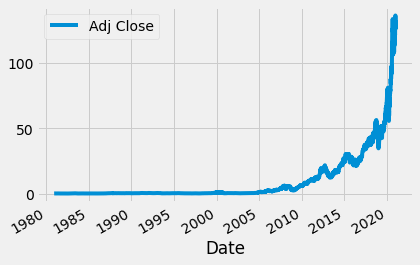

In [19]:
aapl_use.plot(x='Date'
              , y='Adj Close'
             );

In [20]:
# iloc like (x, y) or (row, column)
aapl_use.iloc[0, 1] 

0.10107272118330002

In [21]:
# .loc uses logic
aapl_use.loc[(aapl_use.Date > '2021-01-01') & (aapl_use['Adj Close'] >= 130)]

,Date,Adj Close
10100,2021-01-05,131.009995
10102,2021-01-07,130.919998
10103,2021-01-08,132.050003
10106,2021-01-13,130.889999


In [22]:
aapl_use.loc[(aapl_use.Date >= '2020-01-19') & (aapl_use['Adj Close'] > 80)]

,Date,Adj Close
9864,2020-01-29,80.390747
9865,2020-01-30,80.274246
9870,2020-02-06,80.606384
9874,2020-02-12,81.292099
9875,2020-02-13,80.713219
...,...,...
10104,2021-01-11,128.979996
10105,2021-01-12,128.800003
10106,2021-01-13,130.889999
10107,2021-01-14,128.910004
